<a href="https://colab.research.google.com/github/EthanXC/RedditProject/blob/main/Copy_of_RedditProject1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
!pip install datasets
# FYI the accellerate -u is very important to avoid version issues with torch
!pip install transformers
!pip install accelerate -U
from transformers import AutoTokenizer, RobertaForSequenceClassification
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
!pip install datasets transformers torch evaluate nltk rouge_score
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import evaluate
!pip install pyyaml h5py  # Required to save models in HDF5 format

import time

In [27]:
from datasets import load_dataset
dataset = load_dataset("fddemarco/pushshift-reddit-comments", streaming = True)
it = iter(dataset['train'])
extract_data = next(it)
#print(extract_data)

print(extract_data['body'])
#testing if we can get a sample comment

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

isn ' t this against the first amendment ? doesn ' t the first amendment give us the right to assemble and protest ?


In [28]:
data = {
    'column1_name': ['text'],
    'column2_name': ['score'],
    'column3_name': ['labels']
}

df = pd.DataFrame(data)

In [29]:
df_pre_clean = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column1_name  1 non-null      object
 1   column2_name  1 non-null      object
 2   column3_name  1 non-null      object
dtypes: object(3)
memory usage: 152.0+ bytes


In [30]:
start_df_time = time.time()

In [31]:
import pandas as pd
import re
from collections import Counter

# Initialize an empty list to store rows
rows = []

# Initialize a Counter to count subreddit occurrences and rows per subreddit
subreddit_counts = Counter()
rows_per_subreddit = Counter()

nsfw_keywords = ['nsfw', 'adult', 'sex', 'porn', 'xxx', 'gonewild', 'nudes', 'slut', 'WTF',
                'hentai', 'cum', 'rule34', 'pussy', 'onlyfans', 'milf', 'nude', 'boob']

row_variable = 200000  # only 7,000,000 rows
subreddit_limit_percentage = 0.008  # Limit each subreddit to 0.8% of the total rows

while len(rows) < row_variable:
    extract_data = next(it)
    text = extract_data['body']
    score = extract_data['score']
    labels = extract_data['subreddit']



    # Check if adding this row would exceed the subreddit limit
    if rows_per_subreddit[labels] >= row_variable * subreddit_limit_percentage:
        continue

    # Update subreddit count and rows per subreddit count
    subreddit_counts[labels] += 1
    rows_per_subreddit[labels] += 1

    # Append row data to the list
    rows.append({'text': text, 'score': score, 'labels': labels})

    if len(rows) % 100000 == 0:
        print(len(rows))

# Create DataFrame from the list of rows
df = pd.DataFrame(rows)

print(df.head())
print(subreddit_counts)

100000
200000
                                                text  score     labels
0                                              oil .     -4  AskReddit
1  yeah nice . . . except for the fact that every...      5   politics
2   bro , i figuratively just watched that episode .      2     gaming
3                         this is why u can ' t vote      3   politics
4               it ' s a wizard photograph , harry .      1        WTF
Counter({'AskReddit': 1600, 'politics': 1600, 'gaming': 1600, 'WTF': 1600, 'pics': 1600, 'leagueoflegends': 1600, 'fffffffuuuuuuuuuuuu': 1600, 'videos': 1600, 'atheism': 1600, 'funny': 1600, 'Minecraft': 1600, 'trees': 1600, 'SteamTrade': 1600, 'nfl': 1600, 'AdviceAnimals': 1600, 'worldnews': 1600, 'starcraft': 1600, 'guns': 1600, 'SteamGameSwap': 1600, 'swtor': 1600, 'IAmA': 1600, 'skyrim': 1600, 'gonewild': 1600, 'TwoXChromosomes': 1600, 'battlefield3': 1600, 'mylittlepony': 1600, 'circlejerk': 1600, 'Music': 1600, 'Fitness': 1600, 'Games': 1600, 'movi

In [32]:
end_df_time = time.time()

In [33]:
print("This is the df_time:", {start_df_time - end_df_time})

This is the df_time: {-132.45948553085327}


In [34]:
df.to_csv('output.csv', index=False)

In [35]:
if np.isinf(df['score']).any():
  print("HELLO")

In [36]:
id2label = dict(enumerate(set(df['labels'])))
#print(id2label)

In [37]:

# Load roberta model and tokenizer filling out the code below based on the documentation HINT: Click on on use in transformers and the code will be there
#model_name = "Roberta model"# code unnessisary but I like to use it to store the string name to make the code cleaner
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels = len(id2label))


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
nan_rows = df[df.isna().T.any().T]
nan_rows.head()
null_rows = df[df.isnull().any(axis=1)]
null_rows.head()
if np.isinf(df['score']).any():
  print("HELLO")

df = df[df['score'] > -50]

In [39]:
df['labels'].value_counts()

labels
worldnews              1600
IAmA                   1600
AskReddit              1600
videos                 1600
fffffffuuuuuuuuuuuu    1600
                       ... 
agitation                 1
TibiaMMO                  1
mazda                     1
Epcot                     1
southpaws                 1
Name: count, Length: 3669, dtype: int64

In [40]:
label_counts = df['labels'].value_counts()
labels_to_remove = label_counts[label_counts < 2].index
df = df[~df['labels'].isin(labels_to_remove)]

In [41]:
df['labels'].info()

<class 'pandas.core.series.Series'>
Index: 199061 entries, 0 to 199999
Series name: labels
Non-Null Count   Dtype 
--------------   ----- 
199061 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [42]:
from sklearn.model_selection import train_test_split

#using the train_test_split function and set the test size to .21
train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'], df['labels'], test_size=0.21, stratify = df['labels'])


tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
# Reset the index
train_texts, train_labels = train_texts.reset_index(drop=True), train_labels.reset_index(drop=True)
val_texts, val_labels = val_texts.reset_index(drop=True), val_labels.reset_index(drop=True)
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, return_tensors = "pt")
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, return_tensors = "pt")

In [43]:
id2label_reversed = {v: k for k, v in id2label.items()}
#print(id2label_reversed)

In [44]:
import torch as pt

class SpamDataset(pt.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.values

    def __getitem__(self, idx):
        item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}
        if len(self.labels) > 0:  # Check if labels array has any elements
            labels = self.labels[idx]
            #print(labels)
            labels_converted = id2label_reversed[labels]
            #print(labels_converted)
            item["labels"] = pt.tensor(labels_converted)
        return item
    def __len__(self):
        #print(len(self.labels))
        return len(self.labels)

def list_of_dicts_to_dict_of_lists(d):
  dic = d[0]
  keys = dic.keys()
  values = [dic.values() for dic in d]
  return {k: list(v) for k,v in zip(keys, zip(*values))}

In [45]:
Train_Dataset = SpamDataset(train_encodings, train_labels)
Val_Dataset = SpamDataset(val_encodings, val_labels)

In [46]:
from sklearn.metrics import accuracy_score

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


In [47]:
#%set_env CUDA_LAUNCH_BLOCKING=1

In [48]:
#%env CUDA_LAUNCH_BLOCKING

In [49]:
training_args = TrainingArguments(
    output_dir='my_model',          # output directory
    num_train_epochs=2,              # total number of training epochs, let's try 1 for now
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=48,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=250,
    gradient_accumulation_steps=2,  # Accumulate gradients over 2 batches
    fp16=True,

)



trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = Train_Dataset,
    eval_dataset = Val_Dataset,
    compute_metrics = compute_metrics
    #TODO: figure out what 5 params we need here. There should be 5 and the last is how we compute the metrics later . . .
)

In [50]:
start_train_time = time.time()

In [51]:
# TODO: Train the model (HINT: this is 1 short line of code just calling the trainer)
trainer.train()

<ipython-input-44-d8518a5f2f5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss
250,7.706500
500,6.395600
750,6.044900
1000,5.786800
1250,5.639700
1500,5.506800
1750,5.407600
2000,5.286400
2250,5.229400
2500,5.141700


<ipython-input-44-d8518a5f2f5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-44-d8518a5f2f5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-44-d8518a5f2f5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-44-d8518a5f2f5c>:9: UserWarning: To copy construct from a tensor, i

TrainOutput(global_step=4914, training_loss=5.338130045771647, metrics={'train_runtime': 8341.3637, 'train_samples_per_second': 37.706, 'train_steps_per_second': 0.589, 'total_flos': 8.546581247730278e+16, 'train_loss': 5.338130045771647, 'epoch': 1.9995930824008137})

In [52]:
final_train_time = time.time()
print(f"Training took {final_train_time - start_train_time} seconds")

Training took 8341.716629266739 seconds


In [53]:
#TODO use the evaluate method on the trainer to get and print the results. Feel free to look at Huggingface Docs
results = trainer.evaluate()

<ipython-input-44-d8518a5f2f5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}


In [54]:
print(results)

{'eval_loss': 4.804318904876709, 'eval_accuracy': 0.178527856852379, 'eval_runtime': 340.1211, 'eval_samples_per_second': 122.906, 'eval_steps_per_second': 2.561, 'epoch': 1.9995930824008137}


In [55]:
# TODO: Save the model
trainer.save_model('my_model')

In [56]:
# TODO: Now to finish off I want you to load the model you trained and saved and write a fake spam email for it mthen have the model classify it
model = AutoModelForSequenceClassification.from_pretrained("my_model")
msg = "boston celtics"
msg_encodings = tokenizer(msg, truncation=True, padding=True, return_tensors = "pt")

outputs = model(**msg_encodings)
probabilities = torch.softmax(outputs.logits[0], dim = 0 )
sort_prob = probabilities.sort(descending = True)
#print(f"outputs: {outputs}")


In [57]:
outputs.logits.shape
len(id2label)
probabilities = torch.softmax(outputs.logits[0], dim = 0 )
sort_prob = probabilities.sort(descending = True)
print(sort_prob.values[0].item())
print(id2label[sort_prob.indices[0].item()])



0.5040639042854309
nba


In [58]:
def print_out_top_x_probs(phrase):
    phrase_encoding = tokenizer(phrase, truncation=True, padding=True, return_tensors="pt")
    output = model(**phrase_encoding)
    probabilities = torch.softmax(output.logits[0], dim=0)
    sort_prob_values, sort_prob_indices = probabilities.sort(descending=True)

    for n in range(10):
        tensor_probs = sort_prob_values[n]
        index = sort_prob_indices[n]
        sort_prob_index_int = index.item()
        subreddit_string = id2label[sort_prob_index_int]
        print(f"{n+1}. {subreddit_string} ({'%.2f' % (tensor_probs*100)}%)")


In [67]:
phrase = "hello"
iterations = 5
print_out_top_x_probs(phrase)

1. circlejerk (9.78%)
2. gonewild (1.43%)
3. Minecraft (1.33%)
4. WTF (1.20%)
5. fffffffuuuuuuuuuuuu (1.17%)
6. RandomKindness (1.03%)
7. nsfw (1.03%)
8. playitforward (1.00%)
9. funny (0.97%)
10. AdviceAnimals (0.92%)


In [60]:
# it's time to graph!

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)
    return {
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    }


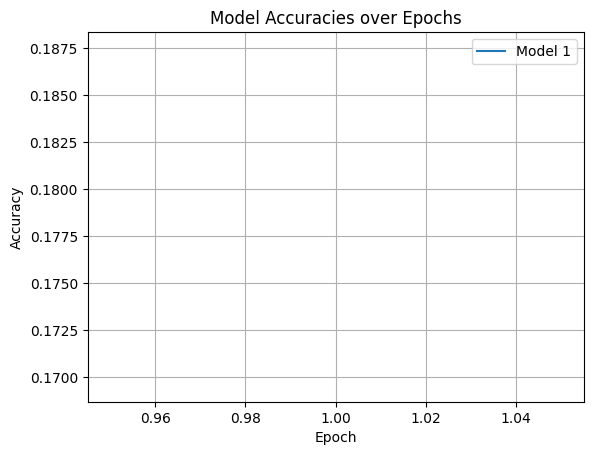

In [75]:
def metric_prepare(trainer, met):
    met_val = [(x[met], x['epoch']) for x in trainer.state.log_history if met in x]
    met_val, epoch = zip(*met_val)

    return met_val

m1_acc = metric_prepare(trainer, "eval_accuracy")


plt.plot(range(1, len(m1_acc) + 1), m1_acc, label="Model 1")



plt.grid()

plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("Model Accuracies over Epochs")

plt.show()


In [77]:
print(results)

{'eval_loss': 4.804318904876709, 'eval_accuracy': 0.178527856852379, 'eval_runtime': 340.1211, 'eval_samples_per_second': 122.906, 'eval_steps_per_second': 2.561, 'epoch': 1.9995930824008137}


In [83]:
trainer.save_model("gdrive/My Drive/Transformers")

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

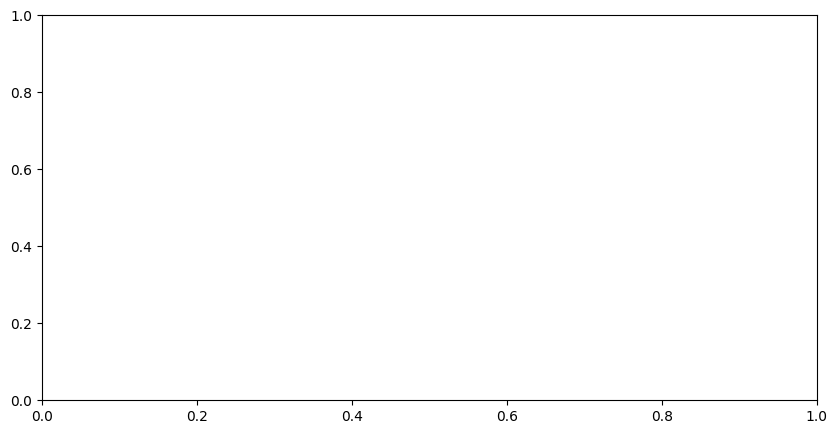

In [81]:


# Extract evaluation loss and accuracy values
eval_loss_values = results['eval_loss']
eval_accuracy_values = results['eval_accuracy']

# Number of epochs
num_epochs = 2
epochs = list(range(1, 2 + 1))

# Plotting evaluation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, eval_loss_values, label="Evaluation Loss", color='b')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evaluation Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Plotting evaluation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, eval_accuracy_values, label="Evaluation Accuracy", color='g')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Evaluation Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()
